### Data Preparation and Feature Engineering

In [2]:
import pandas as pd 
import numpy as np

data = pd.read_csv('loan_data.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40,180.0,1.0,Rural,Y


In [3]:
df = pd.DataFrame(data)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95,360.0,1.0,Urban,Y


In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    int64  
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(3), int64(2), object(8)
memory usage: 38.8+ KB


In [6]:
df.shape

(381, 13)

In [7]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
# Checking for missing values in the dataset
df.isna().sum()

# Filling missing values for categorical columns with mode
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

# Filling missing values for numerical columns with median
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

# Verify if all missing values are handled
df.isna().sum()


C:\Users\Pradip\AppData\Local\Temp\ipykernel_17404\3428400119.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
C:\Users\Pradip\AppData\Local\Temp\ipykernel_17404\3428400119.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### Feature Engineering

In [10]:
# Generating new features through transformations and interactions

# Create Total_Income by summing ApplicantIncome and CoapplicantIncome
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

# Create Debt_to_Income_Ratio by dividing LoanAmount by Total_Income
df['Debt_to_Income_Ratio'] = df['LoanAmount'] / df['Total_Income']

# Convert Loan_Amount_Term from months to years
df['Loan_Term_in_Years'] = df['Loan_Amount_Term'] / 12

# Display the new features
df[['Total_Income', 'Debt_to_Income_Ratio', 'Loan_Term_in_Years']].head()


,Total_Income,Debt_to_Income_Ratio,Loan_Term_in_Years
0,6091.0,0.021015,30.0
1,3000.0,0.022000,30.0
2,4941.0,0.024287,30.0
3,6000.0,0.023500,30.0
4,3849.0,0.024682,30.0


#### Feature Selection

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
print(df.dtypes)


Loan_ID                  object
Gender                   object
Married                  object
Dependents               object
Education                object
Self_Employed            object
ApplicantIncome           int64
CoapplicantIncome       float64
LoanAmount                int64
Loan_Amount_Term        float64
Credit_History          float64
Property_Area            object
Loan_Status              object
Total_Income            float64
Debt_to_Income_Ratio    float64
Loan_Term_in_Years      float64
dtype: object


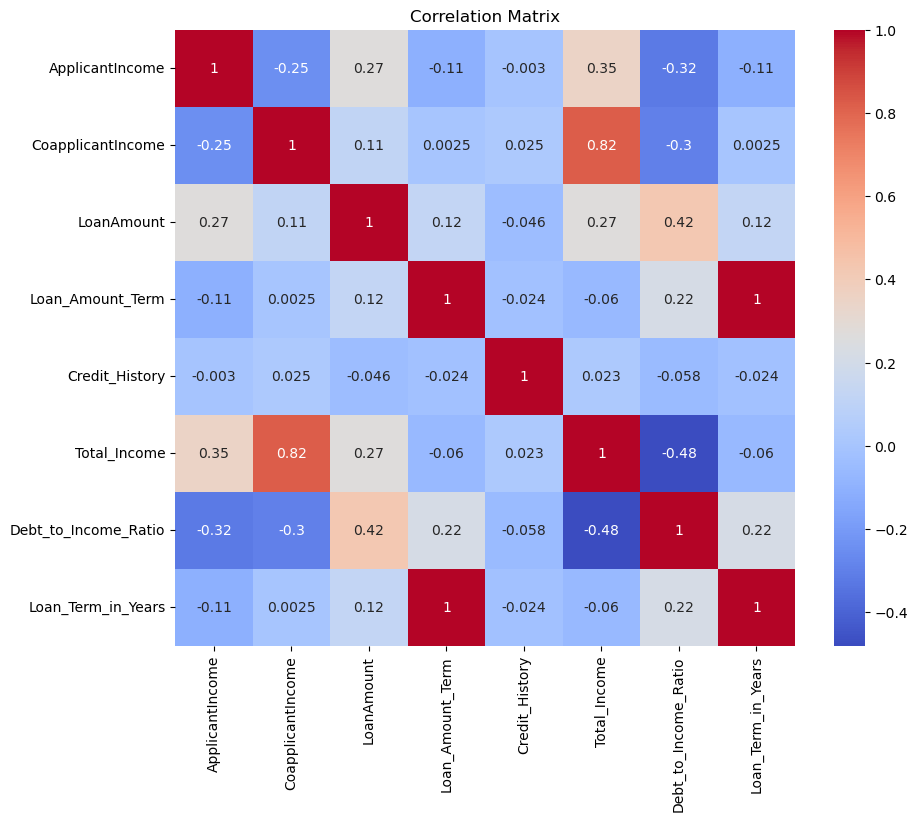

In [14]:
# Filter numeric columns
numeric_df = df.select_dtypes(include='number')

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


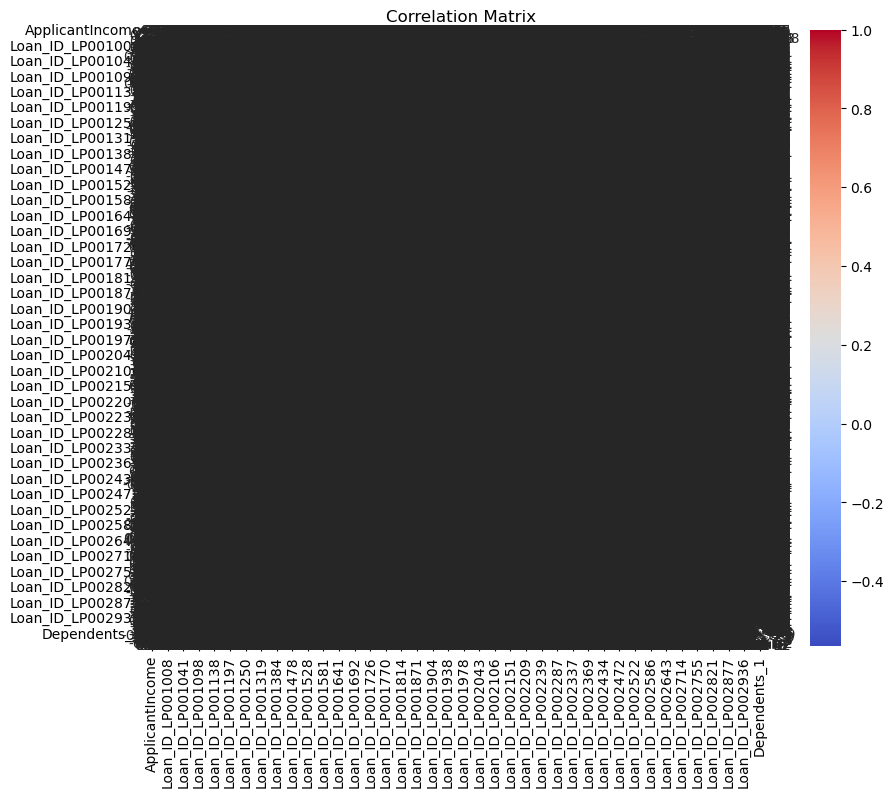

In [15]:
# Convert categorical columns to numeric using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Now create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


#### Model Building and Tuning

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the dataset 
df = pd.read_csv('loan_data.csv')

# Step 1: Check initial missing values
print("Initial missing values:\n", df.isnull().sum())

# Step 2: One-Hot Encode categorical columns
df = pd.get_dummies(df, columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'], drop_first=True)

# Step 3: Fill missing values in numeric columns with median
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Verify if all missing values are handled
print("Missing values after filling:\n", df.isnull().sum())

# Step 4: Prepare features (X) and target (y)
X = df.drop(columns=['Loan_ID', 'Loan_Status'])  
y = df['Loan_Status'].apply(lambda x: 1 if x == 'Y' else 0)  # Convert 'Y' to 1 and 'N' to 0

# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 7: Train a baseline Logistic Regression model
baseline_model = LogisticRegression()
baseline_model.fit(X_train, y_train)

# Step 8: Make predictions and evaluate the model
y_pred = baseline_model.predict(X_test)
print(f"Baseline Model Accuracy: {accuracy_score(y_test, y_pred):.2f}")




Initial missing values:
 Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64
Missing values after filling:
 Loan_ID                    0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Loan_Status                0
Gender_Male                0
Married_Yes                0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Not Graduate     0
Self_Employed_Yes          0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64
Baseline Model Accuracy: 0.81


In [39]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters for tuning
param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

# Perform Grid Search for hyperparameter tuning
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and evaluate
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

print(f"Tuned Model Accuracy: {accuracy_score(y_test, y_pred_tuned):.2f}")


Tuned Model Accuracy: 0.79


In [41]:
from sklearn.ensemble import RandomForestClassifier

# Build and train an advanced model (Random Forest)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate the Random Forest model
y_pred_rf = rf_model.predict(X_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")


Random Forest Accuracy: 0.79


#### Model Evaluation and Reporting

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Function to evaluate model performance
def evaluate_model(y_true, y_pred):
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.2f}")
    print(f"Precision: {precision_score(y_true, y_pred):.2f}")
    print(f"Recall: {recall_score(y_true, y_pred):.2f}")
    print(f"F1 Score: {f1_score(y_true, y_pred):.2f}")
    print(f"ROC-AUC: {roc_auc_score(y_true, y_pred):.2f}")
    print(f"Confusion Matrix: \n{confusion_matrix(y_true, y_pred)}")
evaluate_model(y_test, y_pred)


Accuracy: 0.81
Precision: 0.80
Recall: 0.98
F1 Score: 0.88
ROC-AUC: 0.66
Confusion Matrix: 
[[ 7 14]
 [ 1 55]]


In [47]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.2f}")


Cross-Validation Scores: [0.86885246 0.86885246 0.8852459  0.81967213 0.83333333]
Mean Accuracy: 0.86
